In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
test_data = pd.read_csv('SalaryData_Test(1).csv')

In [23]:
train_data

age          workclass    education  educationno        maritalstatus  \
0       39          State-gov    Bachelors           13        Never-married   
1       50   Self-emp-not-inc    Bachelors           13   Married-civ-spouse   
2       38            Private      HS-grad            9             Divorced   
3       53            Private         11th            7   Married-civ-spouse   
4       28            Private    Bachelors           13   Married-civ-spouse   
...    ...                ...          ...          ...                  ...   
30156   27            Private   Assoc-acdm           12   Married-civ-spouse   
30157   40            Private      HS-grad            9   Married-civ-spouse   
30158   58            Private      HS-grad            9              Widowed   
30159   22            Private      HS-grad            9        Never-married   
30160   52       Self-emp-inc      HS-grad            9   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
0            Adm-clerical   Not-in-family   White     Male         2174   
1         Exec-managerial         Husband   White     Male            0   
2       Handlers-cleaners   Not-in-family   White     Male            0   
3       Handlers-cleaners         Husband   Black     Male            0   
4          Prof-specialty            Wife   Black   Female            0   
...                   ...             ...     ...      ...          ...   
30156        Tech-support            Wife   White   Female            0   
30157   Machine-op-inspct         Husband   White     Male            0   
30158        Adm-clerical       Unmarried   White   Female            0   
30159        Adm-clerical       Own-child   White     Male            0   
30160     Exec-managerial            Wife   White   Female        15024   

       capitalloss  hoursperweek          native  Salary  
0                0            40   United-States   <=50K  
1                0            13   United-States   <=50K  
2                0            40   United-States   <=50K  
3                0            40   United-States   <=50K  
4                0            40            Cuba   <=50K  
...            ...           ...             ...     ...  
30156            0            38   United-States   <=50K  
30157            0            40   United-States    >50K  
30158            0            40   United-States   <=50K  
30159            0            20   United-States   <=50K  
30160            0            40   United-States    >50K  

[30161 rows x 14 columns]

In [24]:
test_data

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [27]:
train_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [28]:
test_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

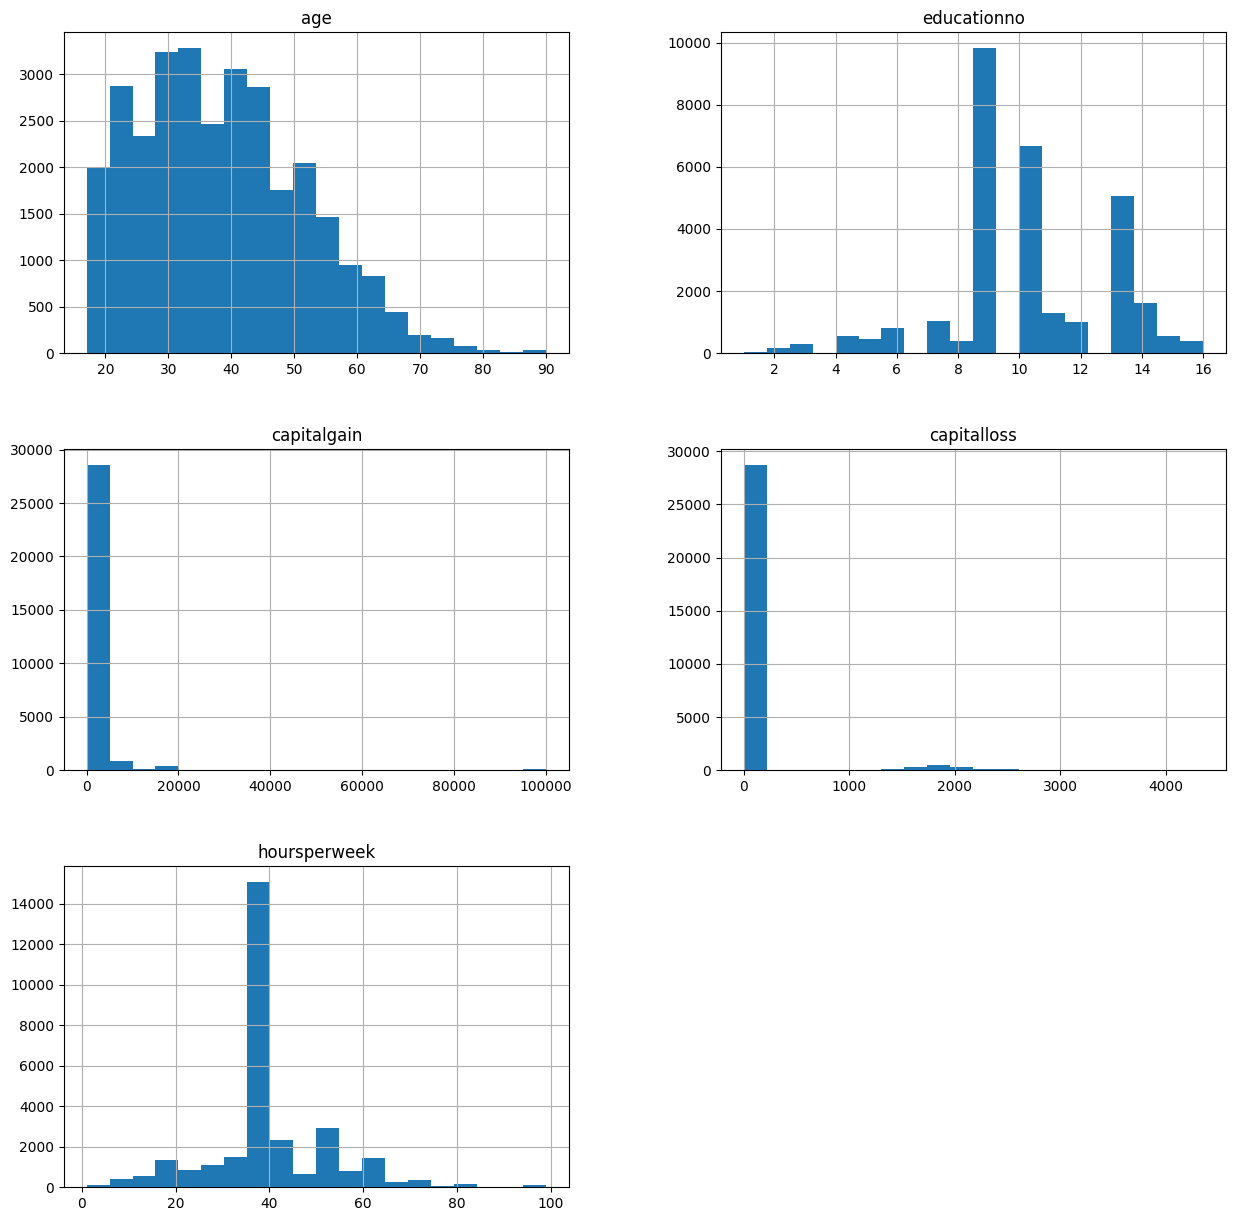

In [29]:
train_data.hist(figsize=(15,15), bins=20)

In [30]:
import seaborn as sns

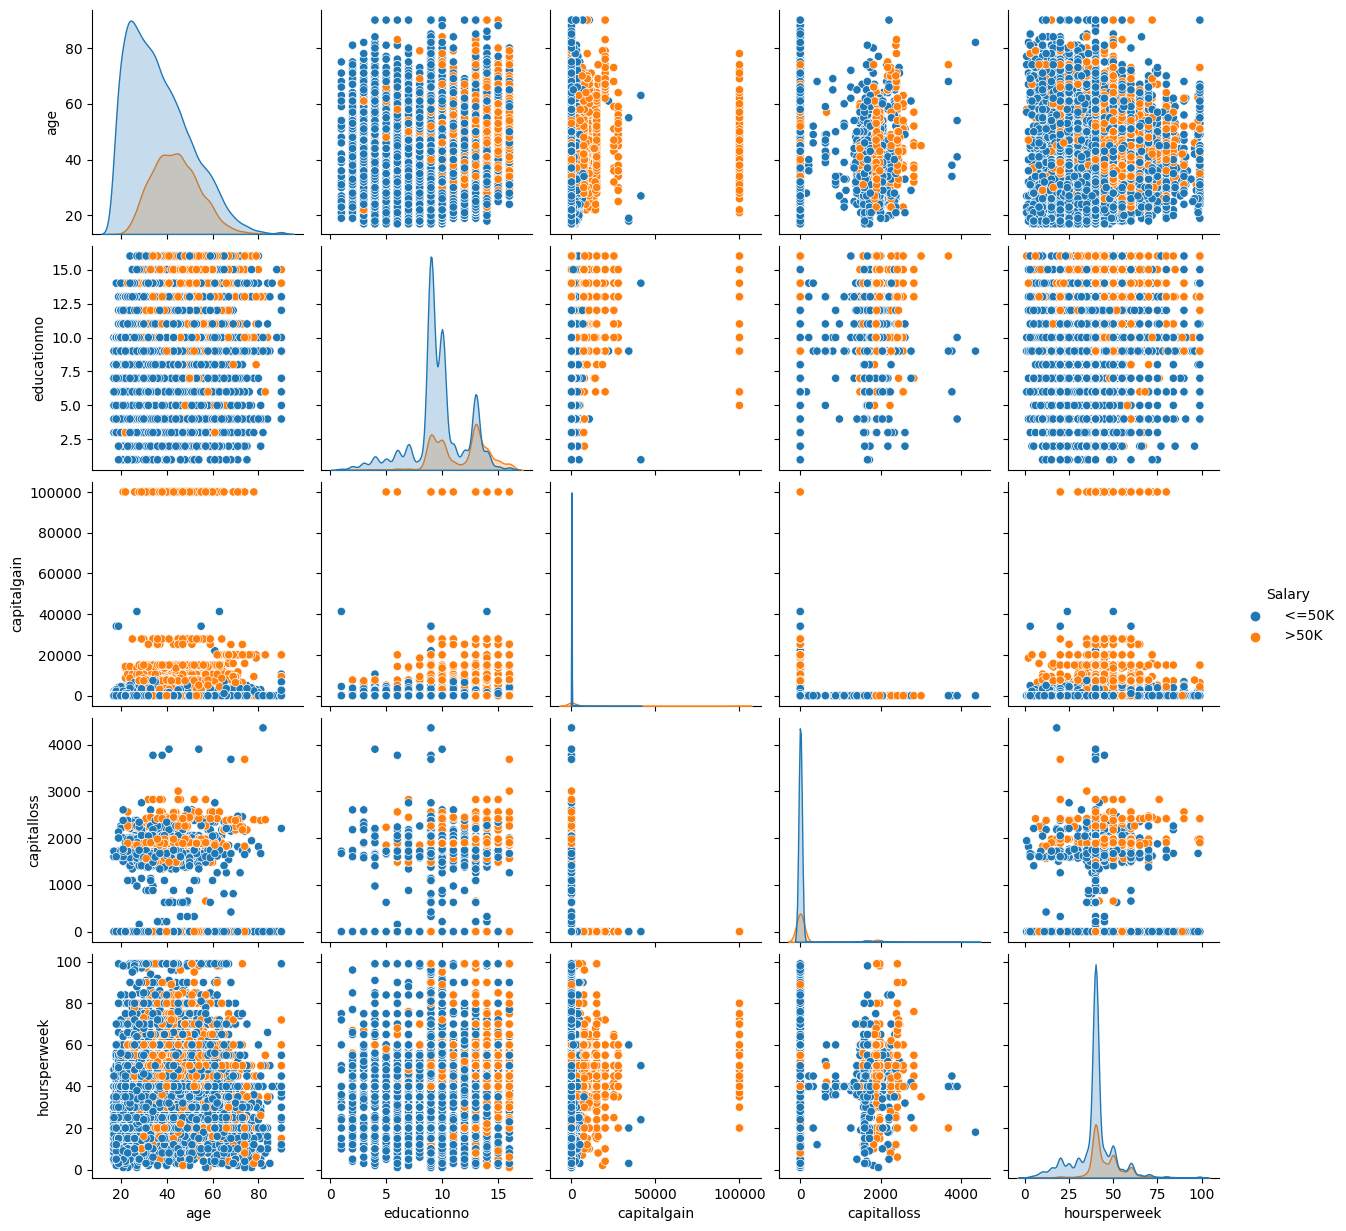

In [31]:
sns.pairplot(train_data,hue='Salary')

In [32]:
from sklearn.preprocessing import LabelEncoder
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data

age  workclass  education  educationno  maritalstatus  occupation  \
0       22          5          9           12              4           0   
1       33          4          9           12              2           3   
2       21          2         11            8              0           5   
3       36          2          1            6              2           5   
4       11          2          9           12              2           9   
...    ...        ...        ...          ...            ...         ...   
30156   10          2          7           11              2          12   
30157   23          2         11            8              2           6   
30158   41          2         11            8              6           0   
30159    5          2         11            8              4           0   
30160   35          3         11            8              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 1     4    1           24            0            39   
1                 0     4    1            0            0            12   
2                 1     4    1            0            0            39   
3                 0     2    1            0            0            39   
4                 5     2    0            0            0            39   
...             ...   ...  ...          ...          ...           ...   
30156             5     4    0            0            0            37   
30157             0     4    1            0            0            39   
30158             4     4    0            0            0            39   
30159             3     4    1            0            0            19   
30160             5     4    0          107            0            39   

       native  Salary  
0          37       0  
1          37       0  
2          37       0  
3          37       0  
4           4       0  
...       ...     ...  
30156      37       0  
30157      37       1  
30158      37       0  
30159      37       0  
30160      37       1  

[30161 rows x 14 columns]

In [33]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data

age  workclass  education  educationno  maritalstatus  occupation  \
0        8          2          1            6              4           6   
1       21          2         11            8              2           4   
2       11          1          7           11              2          10   
3       27          2         15            9              2           6   
4       17          2          0            5              4           7   
...    ...        ...        ...          ...            ...         ...   
15055   16          2          9           12              4           9   
15056   22          2          9           12              0           9   
15057   21          2          9           12              2           9   
15058   27          2          9           12              0           0   
15059   18          3          9           12              2           3   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
0                 3     2    1            0            0            39   
1                 0     4    1            0            0            49   
2                 0     4    1            0            0            39   
3                 0     2    1           87            0            39   
4                 1     4    1            0            0            29   
...             ...   ...  ...          ...          ...           ...   
15055             3     4    1            0            0            39   
15056             1     4    0            0            0            35   
15057             0     4    1            0            0            49   
15058             3     1    1           73            0            39   
15059             0     4    1            0            0            59   

       native  Salary  
0          37       0  
1          37       0  
2          37       1  
3          37       1  
4          37       0  
...       ...     ...  
15055      37       0  
15056      37       0  
15057      37       0  
15058      37       0  
15059      37       1  

[15060 rows x 14 columns]

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,train_data['Salary'], test_size=0.3, random_state=42)

In [35]:
x_train

age  workclass  education  educationno  maritalstatus  occupation  \
27112   18          2         11            8              2           2   
13212    6          2         11            8              2           5   
24111   22          2          9           12              2           3   
22501   16          2         11            8              0           7   
3872    10          3         11            8              5           0   
...    ...        ...        ...          ...            ...         ...   
29802   19          2          7           11              2           3   
5390    24          4         15            9              2           6   
860     20          2         11            8              2           2   
15795   39          4          1            6              2           7   
23654   28          2         15            9              5           2   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
27112             0     4    1            0            0            39   
13212             0     4    1            0            0            39   
24111             5     4    0            0            0            59   
22501             4     4    0            0            0            31   
3872              1     4    1            0            0            37   
...             ...   ...  ...          ...          ...           ...   
29802             5     4    0            0            0            36   
5390              0     4    1           49            0            39   
860               0     4    1            0            0            93   
15795             5     4    0            0            0            39   
23654             1     4    1            0            0            40   

       native  Salary  
27112      37       1  
13212      37       0  
24111      37       1  
22501      37       0  
3872       37       0  
...       ...     ...  
29802      37       0  
5390       37       1  
860        37       1  
15795      37       0  
23654      37       0  

[21112 rows x 14 columns]

In [36]:
x_test

age  workclass  education  educationno  maritalstatus  occupation  \
217     11          2         14           14              4           9   
24912   24          2         11            8              2           2   
17780   36          2         11            8              2           7   
12484   14          2         11            8              2           2   
8890    17          1          9           12              3           9   
...    ...        ...        ...          ...            ...         ...   
20990   15          2         15            9              2          11   
23327   30          4         15            9              2           2   
24639   24          2          9           12              5           9   
7738     7          2         11            8              4          11   
3882     9          5          9           12              4           9   

       relationship  race  sex  capitalgain  capitalloss  hoursperweek  \
217               1     4    1            0            0            54   
24912             0     1    1            0            0            39   
17780             0     4    1            0            0            49   
12484             0     4    1            0            0            44   
8890              1     4    0            0            0            39   
...             ...   ...  ...          ...          ...           ...   
20990             2     1    0            0            0            39   
23327             0     4    1            0            0            39   
24639             1     2    0          117            0            59   
7738              1     4    1            0            0            29   
3882              1     4    1            0            0            39   

       native  Salary  
217        37       1  
24912      34       0  
17780      10       1  
12484      37       0  
8890       37       0  
...       ...     ...  
20990      11       0  
23327      18       1  
24639      37       1  
7738       37       0  
3882       37       0  

[9049 rows x 14 columns]

In [37]:
y_train

27112    1
13212    0
24111    1
22501    0
3872     0
        ..
29802    0
5390     1
860      1
15795    0
23654    0
Name: Salary, Length: 21112, dtype: int64

In [38]:
y_test

217      1
24912    0
17780    1
12484    0
8890     0
        ..
20990    0
23327    1
24639    1
7738     0
3882     0
Name: Salary, Length: 9049, dtype: int64

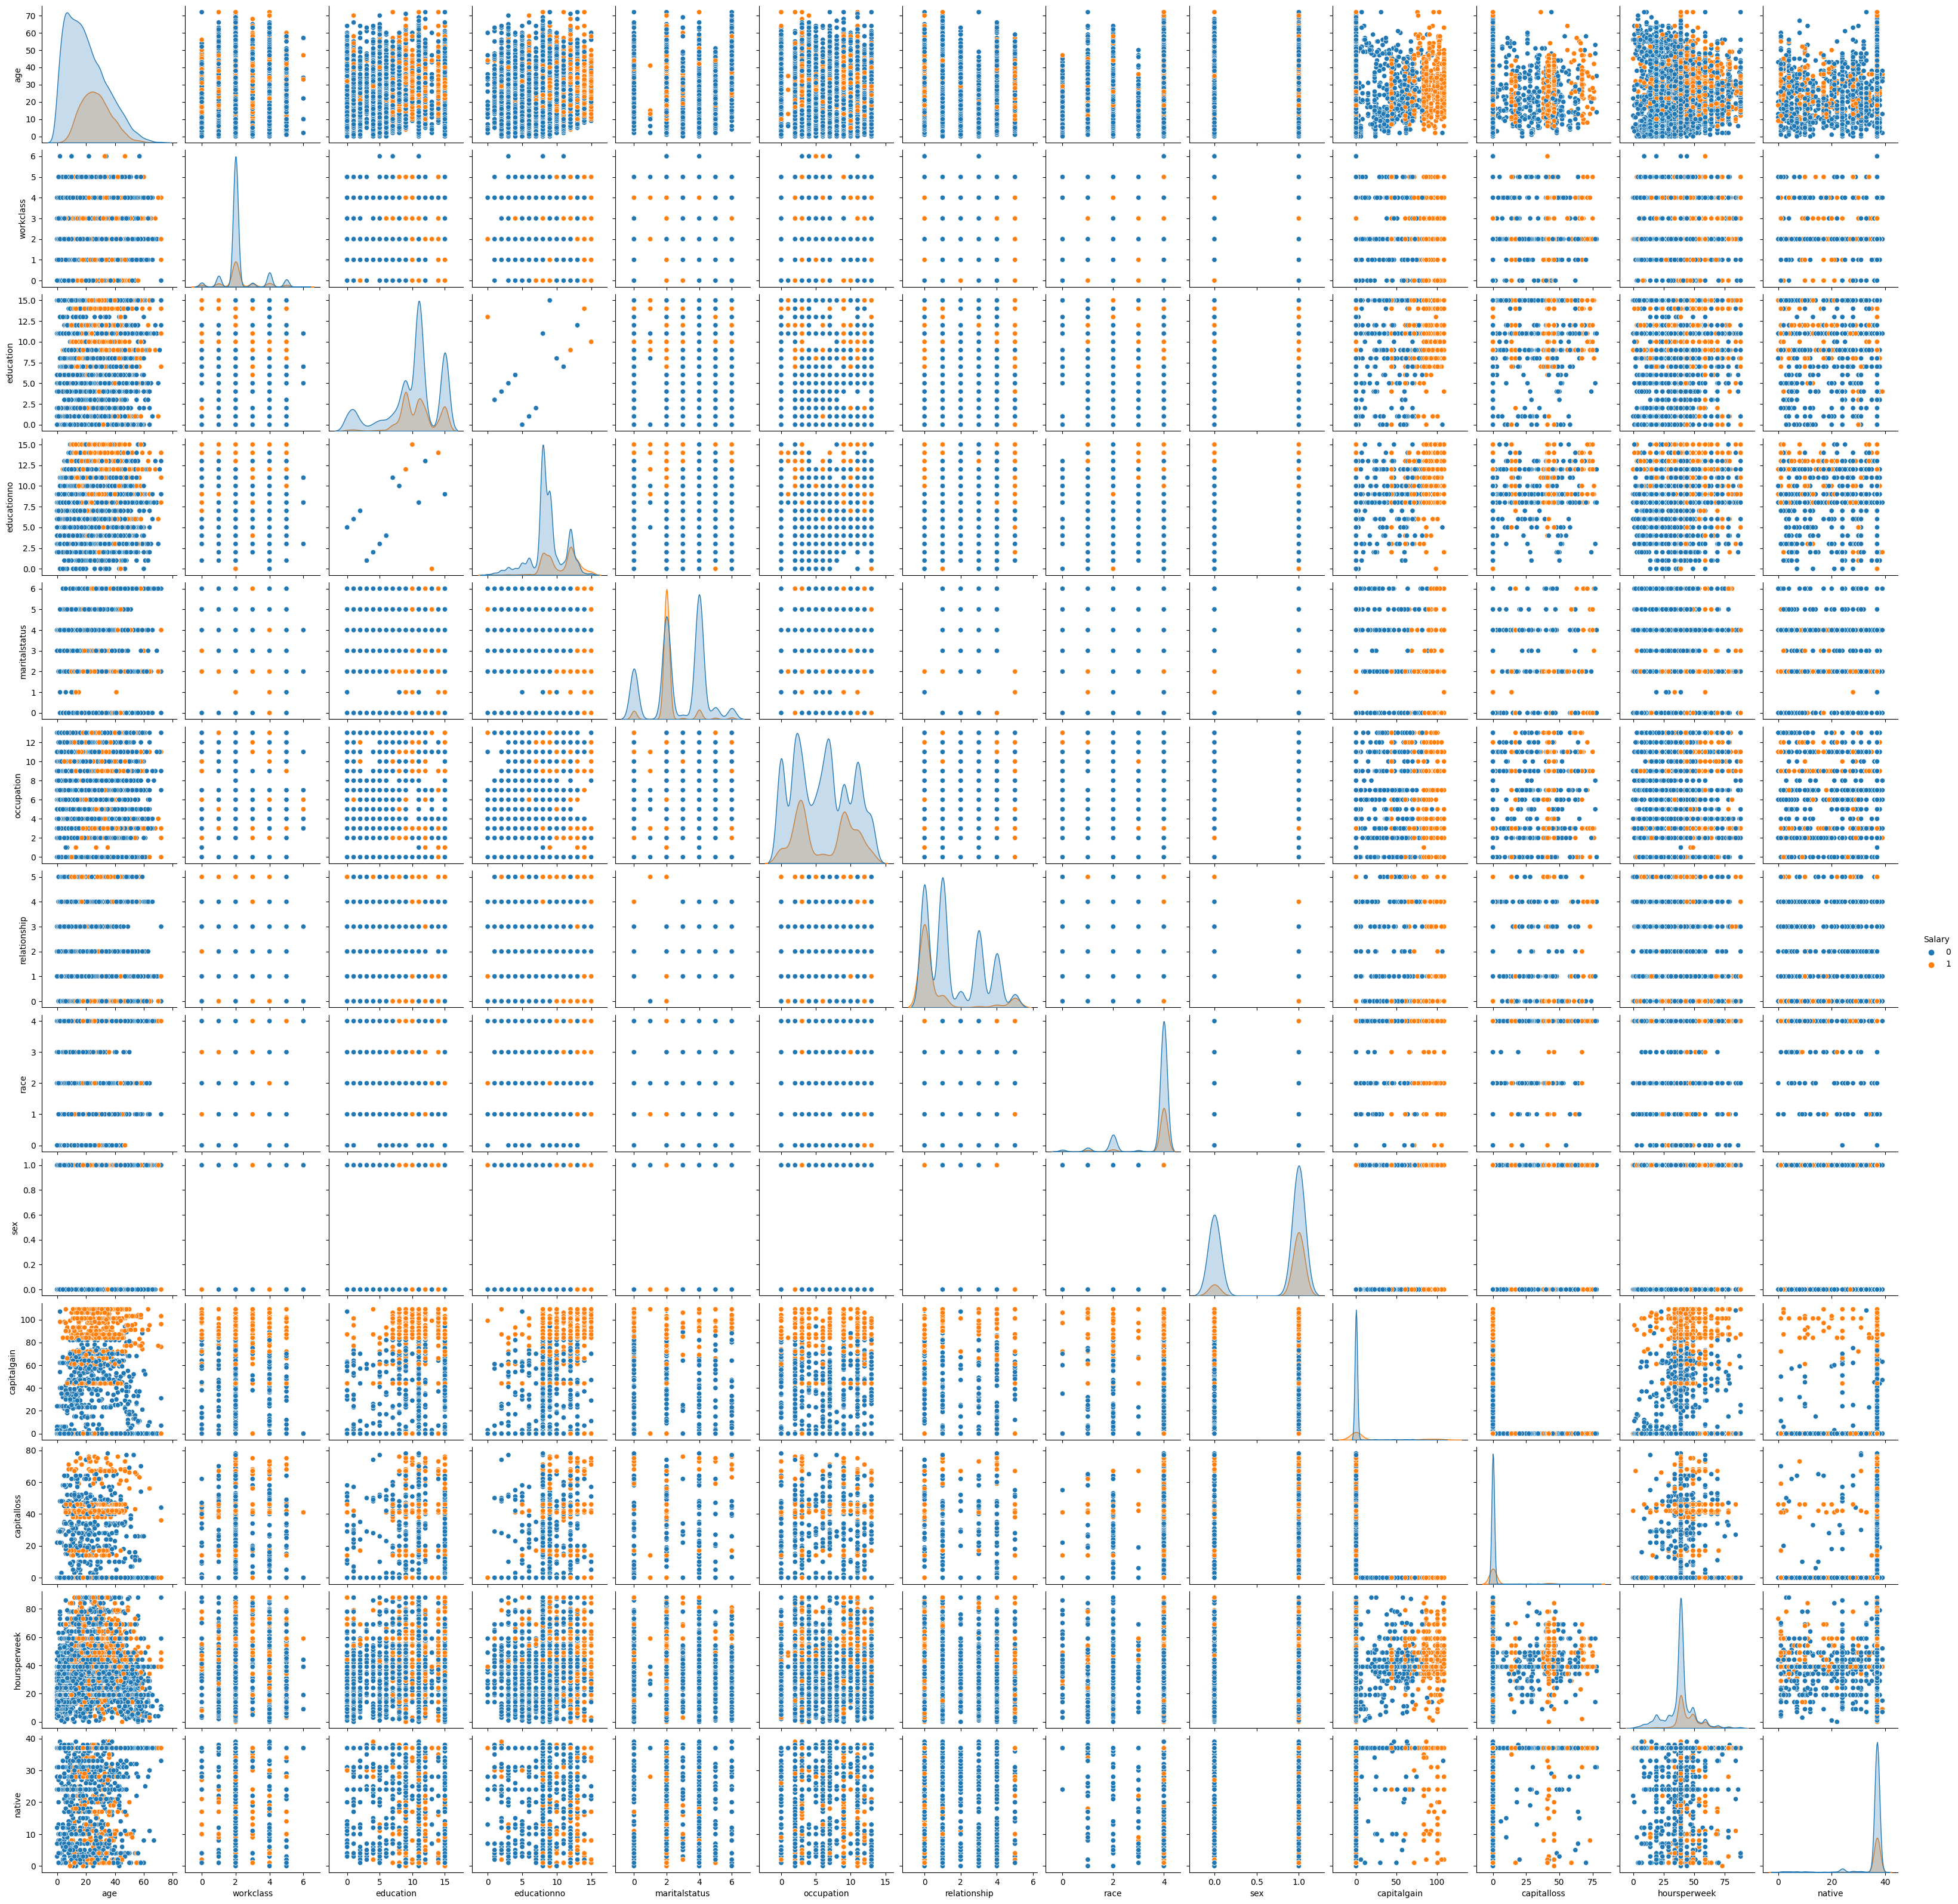

In [40]:
sns.pairplot(test_data,hue='Salary')

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)